In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,633 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122519 files and di

### 필수과제 2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정해 주세요.(필수)
- 모든 변수를 다 사용해도 되고, 피처에대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행도 됩니다. ( 피처에 대한 중요도는 자율로 진행해 주세요! )
- 오늘 배운 군집화를 진행하는 과정에서의 근기들은 꼭 다 코드로 작성 해주셔야 합니다.(필수)

- 필수적으로 공유해야 하는 것 (필수)
- 1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 ( 주석 필수 )
- 2. 해당 군집에 대한 특성 비교 
- 3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지? 
- ( 단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안하는 것) 

### 파일 로드 및 데이터 파악

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [61]:
ct=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/NHcustomer.csv')
ct.rename(columns={'Unnamed: 0':'ID'},inplace=True)
ct.set_index('ID',inplace=True)
ct.head(3)

,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
ID,,,,,,,,,,
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9


In [62]:
ct.info()  
print(ct.shape)
print(ct.index.unique())    # 인덱스 고유함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   계좌         10000 non-null  object
 1   성별         10000 non-null  int64 
 2   연령구간       10000 non-null  int64 
 3   투자성향       10000 non-null  int64 
 4   고객자산구간     10000 non-null  int64 
 5   주거래상품군     10000 non-null  int64 
 6   LIFESTAGE  10000 non-null  int64 
 7   고객등급       10000 non-null  int64 
 8   총투자기간      10000 non-null  int64 
 9   주거래업종구분    10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 859.4+ KB
(10000, 10)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', name='ID', length=10000)


In [63]:
# 계좌명을 제외한 데이터프레임 생성
ct.columns
ct2=ct[['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군', 'LIFESTAGE', '고객등급',
        '총투자기간', '주거래업종구분']]

In [17]:
# 컬럼 확인
for i in ct2.columns:
  print('----------{}--------'.format(i))
  print(ct2[i].value_counts().sort_index(ascending=True))

----------성별--------
1    5985
2    4015
Name: 성별, dtype: int64
----------연령구간--------
1     481
2    1378
3    1524
4    1567
5    1369
6    1415
7    1098
8     787
9     381
Name: 연령구간, dtype: int64
----------투자성향--------
0      171
1      210
2     1467
3     1669
4     1858
5      935
9        3
99    3687
Name: 투자성향, dtype: int64
----------고객자산구간--------
1    3572
2    2740
3    1147
4    1222
5     984
6     335
Name: 고객자산구간, dtype: int64
----------주거래상품군--------
1       34
2     9659
3      261
5        7
6        3
8        8
9        5
10       9
11       3
12       1
15      10
Name: 주거래상품군, dtype: int64
----------LIFESTAGE--------
2    1860
3    1926
4    1164
5    2593
6     851
7     827
8     400
9     379
Name: LIFESTAGE, dtype: int64
----------고객등급--------
1       83
2      345
3     1184
4     2298
5     2687
9     3366
99      37
Name: 고객등급, dtype: int64
----------총투자기간--------
1     962
2    3315
3    4271
4     992
5     312
6     148
Name: 총투자기간, dtype: int64
----

### 결측값 처리
1. 투자성향 - 99(미정의)
2. 주거래상품군 - 99(미정의)
3. 고객등급 - 09(등급 미정의인데 제거해야 하는가? 미정의인 것 자체도 의미가 있지 않나?), 99(결측치)



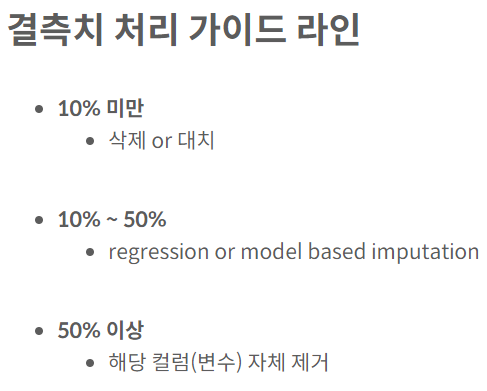

In [64]:
ct2.투자성향.value_counts()        # 결측값이 3687개나 존재한다.
#round(ct.투자성향.value_counts(normalize=True)*100)       # 37프로가 결측값, 회귀 등을 이용한 대치

99    3687
4     1858
3     1669
2     1467
5      935
1      210
0      171
9        3
Name: 투자성향, dtype: int64

In [65]:
ct2.주거래상품군.value_counts()    # 결측값 없다.

2     9659
3      261
1       34
15      10
10       9
8        8
5        7
9        5
11       3
6        3
12       1
Name: 주거래상품군, dtype: int64

In [66]:
ct2.고객등급.value_counts()      # 결측치 37개. 삭제해도 될듯.
ct2.loc[(ct2.고객등급==99) & (ct2.투자성향==99),['고객등급']].count()     # 37개 중 23개가 투자성향 컬럼에 대해서도 결측값임.


고객등급    23
dtype: int64

In [67]:
ct2 = ct2.drop(ct2[(ct2['투자성향']==0) | (ct2['투자성향']==99)].index)
ct2 = ct2.drop(ct2[(ct2['고객등급']==9) | (ct2['고객등급']==99)].index)
ct2 = ct2.reset_index(drop=True)

In [23]:
ct2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   성별         4380 non-null   int64
 1   연령구간       4380 non-null   int64
 2   투자성향       4380 non-null   int64
 3   고객자산구간     4380 non-null   int64
 4   주거래상품군     4380 non-null   int64
 5   LIFESTAGE  4380 non-null   int64
 6   고객등급       4380 non-null   int64
 7   총투자기간      4380 non-null   int64
 8   주거래업종구분    4380 non-null   int64
dtypes: int64(9)
memory usage: 308.1 KB


### 컬럼 간 관계를 보기 위한 히트맵

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages

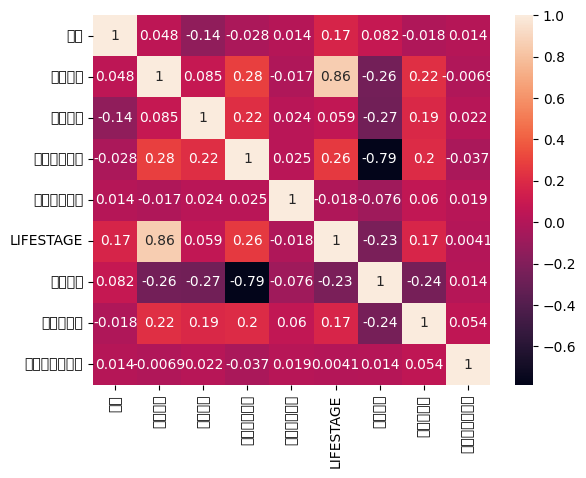

In [68]:
sns.heatmap(ct2.corr(), annot=True)
plt.show()

1. LIFESTAGE-연령구간 약 87프로
2.연령구간-고객자산구간 약 30프로
3. LIFESTAGE-고객자산구간 약 26프로
4. 연령구간-총투자기간 약 24프로
5. 고객등급-연령구간,고객자산구간,총투자기간 등은 유의미한 음의 관계가 있음.

> 다른 변수와 낮은 상관 관계를 가짐: 성별, 주거래상품군

### 스케일링

In [69]:
sc = StandardScaler()
ct2_st = sc.fit_transform(ct2)
ct2_st = pd.DataFrame(ct2_st, columns=ct2.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages

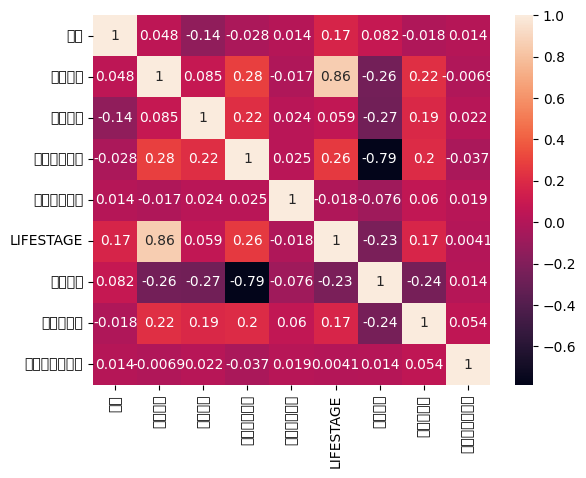

In [70]:
# 정규화 후 히트맵
sns.heatmap(ct2_st.corr(),annot=True)
plt.show()

- 명확한 관계를 가지는 컬럼과 모든 컬럼과 상관관계가 적은 컬럼을 제거한다.

In [71]:
ct2_drop=ct2_st.drop(['연령구간', '고객자산구간', '성별', '주거래상품군'],axis=1)
ct2_drop

,투자성향,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0.495264,0.262505,-2.031676,3.207585,-2.416397
1,0.495264,0.262505,1.009243,3.207585,-0.285248
2,0.495264,0.262505,-1.018037,3.207585,1.579508
3,-1.376398,0.262505,1.009243,2.158588,1.579508
4,-0.440567,0.262505,-0.004397,3.207585,-0.018854
...,...,...,...,...,...
4375,-0.440567,-0.276282,1.009243,-0.988405,-0.018854
4376,1.431095,-0.815069,1.009243,-2.037402,-1.350823
4377,-2.312229,1.340079,1.009243,-0.988405,-0.018854
4378,0.495264,2.417653,1.009243,-0.988405,1.579508


### datawig로 결측값 대치 - 설치 실패..

In [11]:
# !pip3 install datawig

# import datawig

### KNN으로 결측값 대치

In [12]:
!pip3 install impyute
from impyute.imputation.cs import fast_knn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
ct_drop_f=ct_drop.astype(dtype='float64')     # 실수형으로 변환

ct_drop_f.loc[ct_drop_f.투자성향==99,'투자성향']=None   # 결측치에 해당하는 값을 None으로 지정

In [14]:
np_imputed=np.round(fast_knn(ct_drop_f.values, k=5))    # KNN 학습, 결과가 실수값으로 나오니까..그냥 반올림해버림. 이렇게 하면 안될 듯 ㅠ
df_imputed = pd.DataFrame(np_imputed)

/usr/local/lib/python3.10/dist-packages/impyute/imputation/cs/fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


In [15]:
df_imputed.columns=ct_drop_f.columns
df_imputed.투자성향.value_counts()

3.0    4579
4.0    2303
2.0    1463
5.0     933
1.0     209
0.0     170
9.0       3
Name: 투자성향, dtype: int64

In [16]:
df_imputed=df_imputed.astype(dtype='int64')

IntCastingNaNError: ignored

> 결측치가 너무 많아 대체할 수 있는 방법을 찾아보려 했으나 실패하여 그냥 삭제하고 진행

### KModes 사용

In [72]:
!pip install KModes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 엘보우 점수

In [32]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmode = KModes(n_clusters = n_cluster)
        kmode.fit_predict(data)
        sum_of_squared_distance.append(kmode.cost_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')

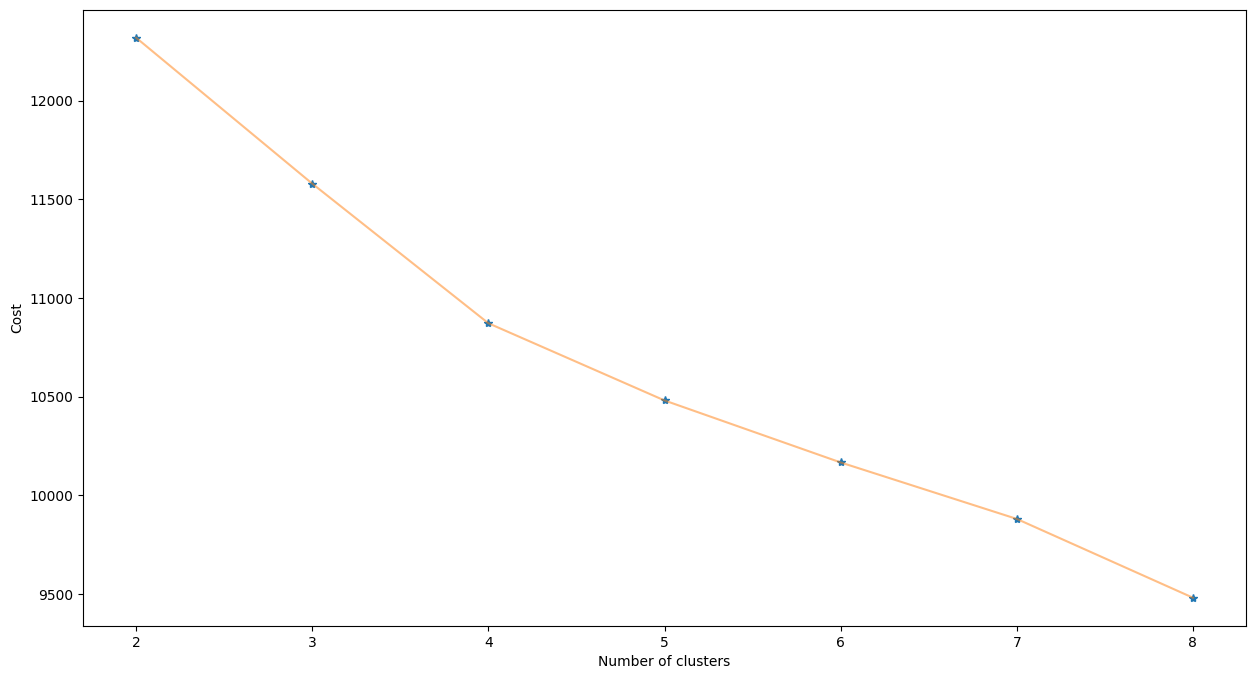

In [34]:
n_clusters = [2,3,4,5,6,7,8]

change_n_clusters(n_clusters, ct2_drop)

### 실루엣 계수

In [35]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KModes(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

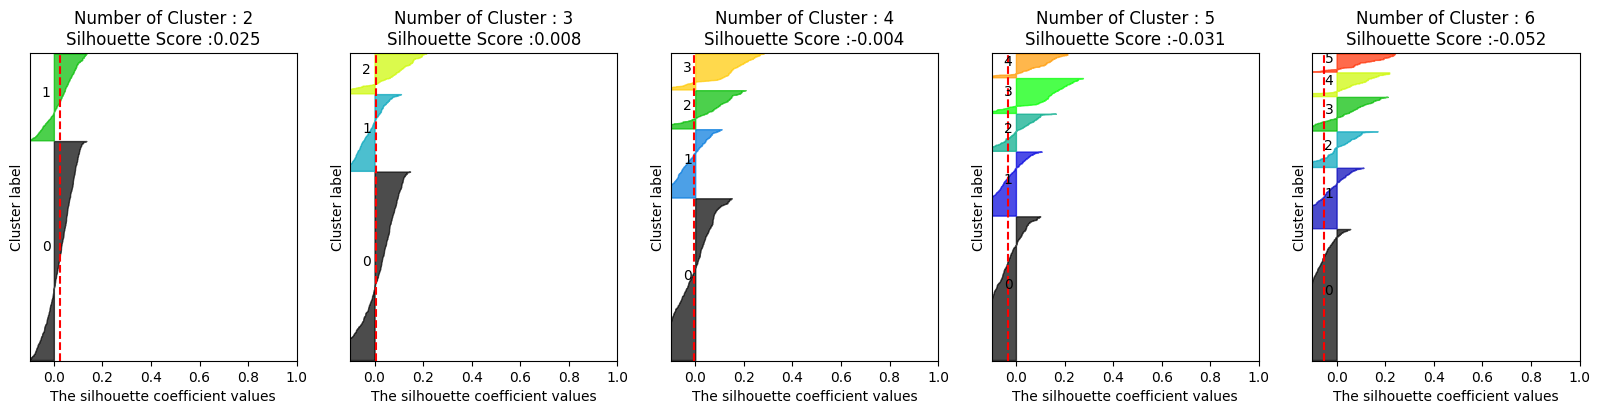

In [36]:
# 전체 칼럼
visualize_silhouette([2,3,4,5,6], ct2_drop)

> kmodes를 이용해 엘보우 점수와 실루엣 계수를 계산했을 때 이상하게 나옴

### kmodes 사용

In [51]:
kmode = KModes(n_clusters=6, random_state=111)
clusters = kmode.fit_predict(ct2_drop)

In [79]:
ct2_drop['cluster'] = clusters
ct2_drop.cluster.value_counts()

0    1894
1     875
2     516
3     488
4     344
5     263
Name: cluster, dtype: int64

### 군집별 시각화

In [87]:
from sklearn.decomposition import PCA

X = ct2_drop.values

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[-0.76887032,  3.05631253],
       [-1.19410117,  1.45116242],
       [-1.22525595,  2.74604745],
       ...,
       [-1.81895055, -1.4819711 ],
       [-1.87255165,  0.38569967],
       [-1.63550236, -0.55726278]])

In [88]:
pca_df=pd.DataFrame(x_pca)
pca_df

,0,1
0,-0.768870,3.056313
1,-1.194101,1.451162
2,-1.225256,2.746047
3,-1.583715,0.186852
4,-1.218564,1.624096
...,...,...
4375,-1.495835,-1.331303
4376,1.715334,-1.501374
4377,-1.818951,-1.481971
4378,-1.872552,0.385700


In [89]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] =ct2_drop['cluster']
pca_df

,0,1,cluster
0,-0.768870,3.056313,0
1,-1.194101,1.451162,0
2,-1.225256,2.746047,0
3,-1.583715,0.186852,0
4,-1.218564,1.624096,0
...,...,...,...
4375,-1.495835,-1.331303,0
4376,1.715334,-1.501374,3
4377,-1.818951,-1.481971,0
4378,-1.872552,0.385700,0


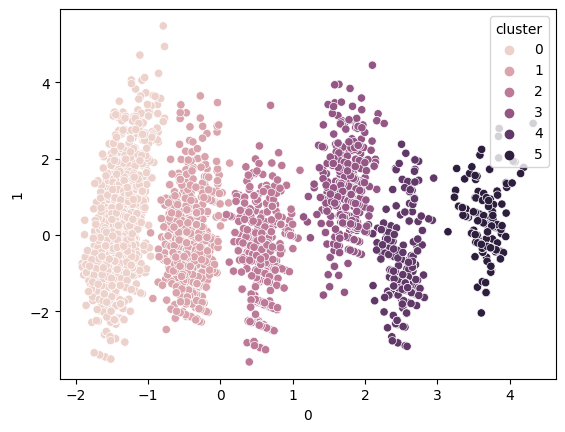

In [56]:
axs = plt.subplots()
axs = sns.scatterplot(data=pca_df,x=0,y=1, hue='cluster')

### 인사이트

In [81]:
ct2_f=ct2.drop(['연령구간', '고객자산구간', '성별', '주거래상품군'], axis=1)
ct2_f['cluster']=ct2_drop['cluster']

In [82]:
ct2_f

,투자성향,LIFESTAGE,고객등급,총투자기간,주거래업종구분,cluster
0,4,5,2,6,1,0
1,4,5,5,6,9,0
2,4,5,3,6,16,0
3,2,5,5,5,16,0
4,3,5,4,6,10,0
...,...,...,...,...,...,...
4375,3,4,5,2,10,0
4376,5,3,5,1,5,3
4377,1,7,5,2,10,0
4378,4,9,5,2,16,0


In [86]:
for i in ct2_f.columns[:-1]:
  print("-------------------{}-----------------".format(i))
  feature = ct2_f.groupby(['cluster'])[i].value_counts(sort=False)
  
  for f in feature.index.levels[0]:
    print(f'----------------Cluster {f}---------------')
    print(feature[f])
    print()

-------------------투자성향-----------------
----------------Cluster 0---------------
투자성향
1     53
2    305
3    306
4    983
5    245
9      2
Name: 투자성향, dtype: int64

----------------Cluster 1---------------
투자성향
1     11
2    124
3    498
4    116
5    126
Name: 투자성향, dtype: int64

----------------Cluster 2---------------
투자성향
1     14
2    368
3     46
4     44
5     44
Name: 투자성향, dtype: int64

----------------Cluster 3---------------
투자성향
1      3
2     22
3     44
4     60
5    359
Name: 투자성향, dtype: int64

----------------Cluster 4---------------
투자성향
1      3
2     29
3    278
4     19
5     15
Name: 투자성향, dtype: int64

----------------Cluster 5---------------
투자성향
2      3
3     14
4    227
5     18
9      1
Name: 투자성향, dtype: int64

-------------------LIFESTAGE-----------------
----------------Cluster 0---------------
LIFESTAGE
2    209
3    145
4    196
5    915
6    128
7    190
8     56
9     55
Name: LIFESTAGE, dtype: int64

----------------Cluster 1---------------
LIFESTA

### 클러스터별 특징
- 클러스터 0.
   - 군집0이 다른 군집에 비해서 상대적으로 비율이 가장 크고 고객등급 중에서도 가장 낮은 등급을 가진 비율이 높다. 하지만 투자전략도 적극투자형으로 투자 잠재성이 매우 높은 고객들로 이루어져 있다고 해도 과언이 아니다.
 - 클러스터 1.
   - 군집0다음으로 군집1도 많은 비율을 차지한다. 군집0과 군집1은 비슷한 점이 많은데 군집1이 나이대가 좀 어리지만 그래도 30대 남성이고 제조업비율이 압도적은 아니지만 여전히 높다. 또한 결혼 적정기이기 때문에 위험중립형인 투자성향이 많다.
 - 클러스터2.
   - 군집2는 안정적인 투자를 하는 성향의 사람들이 모였으며 대다수가 사회초년생이다. 또한 전기/전자 업종에 투자한 사람이 압도적이다. (이것을 보면 전기/전자 업종은 안전한 투자장소임을 알 수 있다.) 그리고 사회초년생이 많기 때문에 자금 부족으로 고객 등급이 낮고, 총투자기간도 대부분이 3년 미만으로 짧은 편이다. 정리하면 군집2는 사회초년생이기 때문에 당장 자금이 부족해 소액으로 안정적인 투자를 하는 회원들이다.
 - 클러스터3.
   - 군집3은 공격투자형의 투자성향의 비율이 가장 높았던 만큼 하이리스크 하이리턴을 추구하는 사람이 많다는 것을 알 수 있다. 로얄등급이 가장 비율이 높았고 다른 군집에 비해 상대적으로 탑클래스의 비율이 높았다. 그리고 투자기간이 가장 긴 것으로 보아 군집3의 고객들은 투자에 적극적인 고객들이 많고 수익기여도가 높으며 자산관리에 관심이 많은 고객들이라는 것을 알 수 있다. 또한 30대의 비율이 높아 이에 맞는 마케팅 전략이 필요해 보인다.
 - 클러스터4.
   - 자산 1천만원이상의 2,30 대 청년 및 가족형성기의 그룹이며, 총투자기간은 1~3년이다. 투자성향은 위험중립형이며 주거래업종의 상위 2개는 전기전자, 서비스/오락/문화 순으로 소비한다.
 - 클러스터 5.
   - 군집 내에서 적극투자형의 고객들이 압도적으로 많다. 가족 형성기의 30대 남성이 가장 많고 30대 여성과 가족 성숙기의 4~50대 남성으로 이루어져있다. 고객 등급은 그린 등급이 대다수이고 평균적으로 1~3년 정도 투자한다. 다른 군집과 비교했을 때 가장 큰 차이점은 주거래 업종이 ‘서비스/오락/문화’인 고객들이 가장 많다는 것이었다.
 

### 클러스터 별 마케팅 전략
 - 클러스터 0.
   - 군집0은 적극투자형의 잠재 고객들을 위한 과감한 혜택과 리워드를 제공하는 것이 더 좋겠고 4~50대 남성의 경우에는 개인적인 선택으로 물론 하겠지만 주변의 인맥들에 의하여 영향을 많이 받을 것이다. 따라서 회사의 매출에도 큰 영향을 미칠 것이며 4~50대는 가장 자본력이 큰 세대이기 때문에 회사측에서도 전략을 잘 짜야 될 것이다. 특히 제조업과 밀접하게 관련이 되어있고 매력이 있는 세일즈 전략을 세워야겠다.
 
 - 클러스터 1.
   - 군집0과 군집1이 많은 비율을 차지하기 때문에 군집 두 고객층을 주고객으로 삼는 전략적 마케팅을 하는 것이 좋겠다. 요즘 30대들은 시대의 변화에 가장 빠르게 대처하는 세대이다. 따라서 군집 0과 비슷하지만 니즈에 맞게 차별화된 전략을 세우는게 중요할 것이다. 또한 결혼 적정기의 고객들을 위한 세부적인 혜택들을 추가하여 이들을 잡아야 될 것이다.
 
 - 클러스터 2.
   - 전기/전자 업종 외의 다른 안정적인 투자가 가능한 업종을 추천하여 다양한 업종에 투자하도록 유도하는 방안과 지금은 자금이 부족하지만 잠재적으로 오래, 많은 금액을 투자할 수 있는 젊은 사람들이므로 금융교육을 받을 수 있게 함과 동시에 조금 더 공격적인 투자를 권하는 방안을 생각해볼 수 있다.
 
 - 클러스터 3.
   - 30대라는 나이대를 취업시장의 연령이 높아지면서 사회생활 10년차전후 나이대라고 생각하고 자산가치의 변동에 따른 손실의 위험을 적극 수용하는 공격투자형인만큼 하이리스크 하이리턴 주식형 펀드 상품을 개발하고 군집3 고객을 타겟으로 삼아 이 펀드 상품의 광고를 보여준다. 또는 소유하고 있는 자산으로 고수익을 낼 수 있는 원금부분보장형 ELS(주가연계증권)나 DLS(파생결합증권) 등의 상품을 추천하여 판매하거나 투자자별로 자산을 운용하는 신탁 상품을 추천해준다. 재테크나 자산 관리 방법에 대해 잘 모를 시기라 생각해 금융경제교육을 제공하는 방안도 생각해 보았다.
 
 - 클러스터 4.
   - 위험중립형이란, 투자위험성에 충분히 인식하고 있으며, 예적금보다 높은 수익을 기대할 수 있다면 일정 수준의 손실위험을 감수할 수 있는 성향이다. 보유 자산이 높지 않고, 정착되지 못한 그룹이므로, 안정성을 추구하면서도 높은 수익을 기대하는 심리가 반영된 결과인 것 같다. 일정 수준의 위험을 감수하면서 예,적금보단 높은 수익을 기대하지만, 투자 위험성을 최소화하는 금융 상품으로는 다음과 같은 상품이 있다.
   - 투자등급 회사채: 위험을 분산시키면서 상대적으로 안정적인 이자수익 제공
   - 다각화된 투자 포트폴리오: 다양한 자산클래스에 투자하여 위험 분산(ETF, 상장투자신탁)
   - 주식시장 지수 펀드: 주식 시장 전반에 분산 투자, 대형 주식 시장 지수를 추종하도록 설계 -> 시장 변동성 완화
   - 상환보증서: 투자상품의 손실을 보장하는 보험 상품, 수익을 제한하는 경우도 있으므로 검토 필요
 
 - 클러스터 5.
   - 적극투자형은 투자원금의 보전보다는 위험을 감내하더라도 높은 수준의 투자수익 실현을 추구하며 투자자금의 상당 부분을 주식, 주식형펀드 또는 파생상품 등의 위험자산에 투자할 의향이 있는 성향이다. 따라서 군집5를 타겟으로 하여 주식형 펀드나 ETF등의 고수익을 챙길 수 있는 금융상품을 홍보하여 판매한다. 금융 상품 품목 중에서도 엔터 기업과 협업하여 새로운 상품을 개발하여 추천하면 군집5 고객들을 대상으로 가장 좋은 실적을 얻을 수 있을 것이다.